In [24]:
import dask
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import *
import jieba
import re
import string
from zhon.hanzi import punctuation, stops, non_stops
import gensim
from gensim.models.word2vec import Word2Vec, LineSentence
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import timeit
import warnings
import zipfile
import os
import sys
warnings.filterwarnings('ignore')

In [2]:
# load the corpus for word2vec
user = input("Who is using the notebook? ")
if user == "Tim":
    corpus_name = "/Users/timqzhang/Desktop/UChicago/MACSS_Spring_2020/content_local/rmrb/7z"
elif user == "Linghui":
    corpus_name = "/Users/linghuiwu/uchicago/courseworks/soci40133/rmrb/7z"
elif user == "Minghao":
    corpus_name = "D:/学习资料/研一三学期/Content Analysis/Final_Project/rmrb/7z"
elif user == "Minghao_RCC":
    corpus_name = "/home/mhyang/EconContent/corpus_by_year/"

Who is using the notebook? Minghao_RCC


### Word2Vec with full sample

In [3]:
# a first time indicator 
# please enter "No" because the word2vec model with full sample has been uploaded to git repo
first_time = input("Is this the first time to train the model? ")

Is this the first time to train the model? No


In [8]:
%%time
if first_time == "Yes":
#     corpus_full = []
#     for year in range(1965, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus_full.append(tokens)
#     model = Word2Vec(corpus_full, size=200, window=10, min_count=5, workers=8, seed=0)
#     model.save('../data/rmrb_full_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model = Word2Vec.load('../data/rmrb_full_W2V')
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

Wall time: 2.22 s


In [9]:
# most similar words to "经济"
model.most_similar("经济", topn=30)

[('国民经济', 0.7047548890113831),
 ('经济社会', 0.6835517287254333),
 ('在经济上', 0.584583044052124),
 ('城乡经济', 0.5507814884185791),
 ('工业生产', 0.5420782566070557),
 ('商品流通', 0.5362972021102905),
 ('对外贸易', 0.5362279415130615),
 ('经济繁荣', 0.5219799280166626),
 ('工业', 0.5194350481033325),
 ('宏观经济', 0.5095250606536865),
 ('产业', 0.5007330775260925),
 ('商品生产', 0.49550092220306396),
 ('商品经济', 0.4891799986362457),
 ('政治经济', 0.48831894993782043),
 ('物资流通', 0.4858139753341675),
 ('生产力', 0.48249131441116333),
 ('出口贸易', 0.4787532389163971),
 ('国家', 0.4786701202392578),
 ('经贸', 0.475691556930542),
 ('平衡', 0.47392386198043823),
 ('企业', 0.4730418622493744),
 ('发展', 0.4718932807445526),
 ('稳定', 0.46824193000793457),
 ('赖际', 0.46810856461524963),
 ('沿海经济', 0.4664963185787201),
 ('集体经济', 0.4660484790802002),
 ('生产', 0.46557676792144775),
 ('旅游业', 0.4646378755569458),
 ('加工工业', 0.464486300945282),
 ('国际贸易', 0.4625011384487152)]

In [10]:
# most similar words to "政治"
model.most_similar("政治", topn=30)

[('在政治上', 0.7189272046089172),
 ('政治素质', 0.49460527300834656),
 ('党的建设', 0.4752221703529358),
 ('崇美', 0.4627997875213623),
 ('党建', 0.4455682337284088),
 ('道德修养', 0.44051045179367065),
 ('教育', 0.4352807402610779),
 ('作风纪律', 0.4329605996608734),
 ('社会主义', 0.43256697058677673),
 ('德党', 0.42983633279800415),
 ('政治路线', 0.4284876585006714),
 ('党的领导', 0.42812931537628174),
 ('政治宣传', 0.4278131127357483),
 ('政治性', 0.4265213906764984),
 ('必须', 0.4184496998786926),
 ('专政', 0.4180828332901001),
 ('军事', 0.4180217981338501),
 ('社会', 0.4163997769355774),
 ('道德', 0.41571980714797974),
 ('阶级斗争', 0.413579523563385),
 ('革命性', 0.41300487518310547),
 ('加诺兄', 0.41279923915863037),
 ('上筑牢', 0.4124164283275604),
 ('理论', 0.4100203514099121),
 ('资产阶级', 0.40842607617378235),
 ('民主', 0.4040853679180145),
 ('政治工作者', 0.4038689136505127),
 ('强调', 0.4020741581916809),
 ('意识形态', 0.401529461145401),
 ('巴迪亚', 0.3998579978942871)]

In [11]:
# most similar words to "政治" + "经济"
model.most_similar(positive=[u"政治", u"经济"], topn=20)

[('社会', 0.5568037033081055),
 ('社会主义', 0.5322310924530029),
 ('政治经济', 0.5294690132141113),
 ('国民经济', 0.5292337536811829),
 ('巴迪亚', 0.5210733413696289),
 ('经济社会', 0.518622100353241),
 ('必须', 0.5129322409629822),
 ('改革', 0.507105827331543),
 ('西元彻', 0.5062365531921387),
 ('在政治上', 0.4994303584098816),
 ('关系', 0.4970846176147461),
 ('德党', 0.49647772312164307),
 ('文化', 0.4950624108314514),
 ('各项', 0.49228447675704956),
 ('发展', 0.4885441064834595),
 ('政策', 0.4873436689376831),
 ('方面', 0.4856113791465759),
 ('自身', 0.48548656702041626),
 ('船旗国', 0.4851929843425751),
 ('通政', 0.4812116026878357)]

In [12]:
# most similar words to "企业"
model.most_similar("企业", topn=20)

[('国营企业', 0.7253013253211975),
 ('骨干企业', 0.6966310143470764),
 ('集体企业', 0.6965148448944092),
 ('小企业', 0.6924573183059692),
 ('工商企业', 0.6889418363571167),
 ('国有企业', 0.6807361841201782),
 ('小型企业', 0.6621137857437134),
 ('乡镇企业', 0.6548891663551331),
 ('行业', 0.652941107749939),
 ('经营', 0.6449532508850098),
 ('外贸企业', 0.6357970237731934),
 ('亏损企业', 0.6312141418457031),
 ('三资企业', 0.5996057391166687),
 ('产品', 0.5948319435119629),
 ('中小企业', 0.5900083780288696),
 ('资产', 0.587431013584137),
 ('工厂', 0.5856354236602783),
 ('化工企业', 0.5763827562332153),
 ('全民企业', 0.5759526491165161),
 ('单位', 0.572801411151886)]

In [13]:
# 公有制 + 资本主义 - 社会主义
model.most_similar(positive=[u'公有制', u'资本主义'], negative=[u'社会主义'])

[('墙脚', 0.5380445122718811),
 ('公有', 0.535496711730957),
 ('初级阶段', 0.4975186884403229),
 ('私有制', 0.49537062644958496),
 ('私有化', 0.46867311000823975),
 ('国营经济', 0.4633598327636719),
 ('单干', 0.4611584544181824),
 ('两极分化', 0.4496586322784424),
 ('所有制', 0.44949597120285034),
 ('个体经济', 0.4468238949775696)]

In [14]:
# 公有制 + 资本主义 - 社会主义
model.most_similar(positive=[u'计划经济', u'资本主义'], negative=[u'社会主义'])

[('市场经济', 0.5006380677223206),
 ('统购包销', 0.4762028455734253),
 ('小农经济', 0.4687221646308899),
 ('墙脚', 0.4580497741699219),
 ('统得', 0.4492679536342621),
 ('商品经济', 0.44538071751594543),
 ('初级阶段', 0.440067321062088),
 ('短缺经济', 0.42808371782302856),
 ('空想', 0.42348188161849976),
 ('计划体制', 0.41563528776168823)]

### Projection with economics and politics subsample

In [15]:
# most similar words to "计划经济"
model.most_similar("计划经济")

[('计划体制', 0.6442259550094604),
 ('计划调节', 0.6439828872680664),
 ('市场调节', 0.6180932521820068),
 ('短缺经济', 0.5950658917427063),
 ('转轨', 0.5811647176742554),
 ('高度集中', 0.5631114840507507),
 ('经济体制', 0.5481372475624084),
 ('体制', 0.5398797988891602),
 ('市场机制', 0.5385992527008057),
 ('统得', 0.5231367349624634)]

In [16]:
# most similar words to "市场经济"
model.most_similar("市场经济")

[('商品经济', 0.8256054520606995),
 ('经济体制', 0.5783637166023254),
 ('商品生产', 0.5539597272872925),
 ('市场机制', 0.5441486239433289),
 ('初级阶段', 0.5326134562492371),
 ('计划经济', 0.5151219367980957),
 ('自我完善', 0.5099714994430542),
 ('义利观', 0.4840741753578186),
 ('市场调节', 0.48258620500564575),
 ('法制', 0.48011767864227295)]

In [17]:
# words to create dimensions
TargetWords = ['计划经济', '短缺经济', '计划', '计划调节', '计划体制', '市场经济', '商品经济', '市场', '市场调节', '市场机制']

In [18]:
# words to be mapped: industries (come from 《国民经济行业分类》)
TargetWords += ['农业', '采矿业', '制造业', '能源工业', '建筑业', '零售业', '交通运输业', 
                '餐饮业', '金融业', '房地产业', '新闻业']

In [19]:
# most similar words to "企业"
model.most_similar("企业", topn=40)

[('国营企业', 0.7253013253211975),
 ('骨干企业', 0.6966310143470764),
 ('集体企业', 0.6965148448944092),
 ('小企业', 0.6924573183059692),
 ('工商企业', 0.6889418363571167),
 ('国有企业', 0.6807361841201782),
 ('小型企业', 0.6621137857437134),
 ('乡镇企业', 0.6548891663551331),
 ('行业', 0.652941107749939),
 ('经营', 0.6449532508850098),
 ('外贸企业', 0.6357970237731934),
 ('亏损企业', 0.6312141418457031),
 ('三资企业', 0.5996057391166687),
 ('产品', 0.5948319435119629),
 ('中小企业', 0.5900083780288696),
 ('资产', 0.587431013584137),
 ('工厂', 0.5856354236602783),
 ('化工企业', 0.5763827562332153),
 ('全民企业', 0.5759526491165161),
 ('单位', 0.572801411151886),
 ('国企', 0.5710006952285767),
 ('外资企业', 0.5680456161499023),
 ('大中企业', 0.5668426156044006),
 ('国有资产', 0.5625597238540649),
 ('企业经营者', 0.5600638389587402),
 ('上市公司', 0.5492286682128906),
 ('私营企业', 0.548046350479126),
 ('大厂', 0.5462716221809387),
 ('经营者', 0.5420036315917969),
 ('民营企业', 0.5411615371704102),
 ('子公司', 0.5393684506416321),
 ('医药企业', 0.5352437496185303),
 ('工业', 0.535004198551178),
 (

In [20]:
# words to be mapped: firms 
TargetWords += ['国营企业', '集体企业', '国有企业', '乡镇企业', 
                '三资企业', '外资企业', '私营企业', '民营企业']

In [21]:
# words submatrix
WordsSubMatrix = []
for word in TargetWords:
    WordsSubMatrix.append(model[word])
WordsSubMatrix = np.array(WordsSubMatrix)

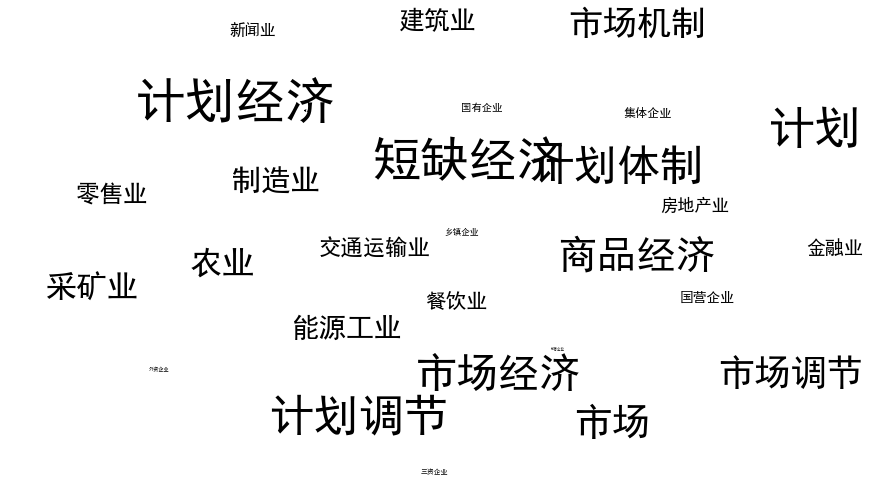

In [27]:
# Visualization
PCATargetWords = PCA(n_components = 20).fit(WordsSubMatrix)
ReducedPCA_data = PCATargetWords.transform(WordsSubMatrix)
TSNETargetWords = TSNE(n_components = 2).fit_transform(ReducedPCA_data)

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(TSNETargetWords[:, 0], TSNETargetWords[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(TargetWords):
    ax.annotate(word, (TSNETargetWords[:, 0][i], TSNETargetWords[:, 1][i]), 
                size=50 * (len(TargetWords) - i) / len(TargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [43]:
# necessary functions
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = (np.array([normalize(model[x]) for x in positives]).sum(axis=0) - 
            np.array([normalize(model[y]) for y in negatives]).sum(axis=0))
    return diff

In [44]:
# Create dimensions
plan_mkt = dimension(model,
                     ['计划经济', '短缺经济', '计划', '计划调节', '计划体制'],
                     ['市场经济', '商品经济', '市场', '市场调节', '市场机制'])

In [46]:
# Create domains
Industries = ['农业', '采矿业', '制造业', '能源工业', '建筑业', '零售业', 
              '交通运输业', '餐饮业', '金融业', '房地产业', '新闻业']

Firms = ['国营企业', '集体企业', '国有企业', '乡镇企业', 
         '三资企业', '外资企业', '私营企业', '民营企业']

In [58]:
def makeDF(model, word_list):
    p_m = []
    for word in word_list:
        p_m.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), plan_mkt.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Regime': p_m}, index = word_list)
    return df

In [59]:
# Get the projections
Inddf = makeDF(model, Industries)
Firmdf = makeDF(model, Firms)

In [84]:
# Functions for plotting
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 15, x=0.11, y=1.1)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

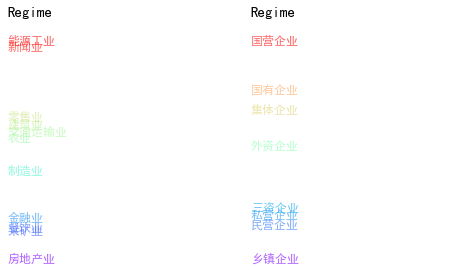

In [85]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, Inddf, 'Regime')
ax2 = fig.add_subplot(122)
PlotDimension(ax2, Firmdf, 'Regime')
plt.show()